# Neural Networks
January 8th 2020

## Example 1 `redes_primer.R`

In [4]:
library(RSNNS)

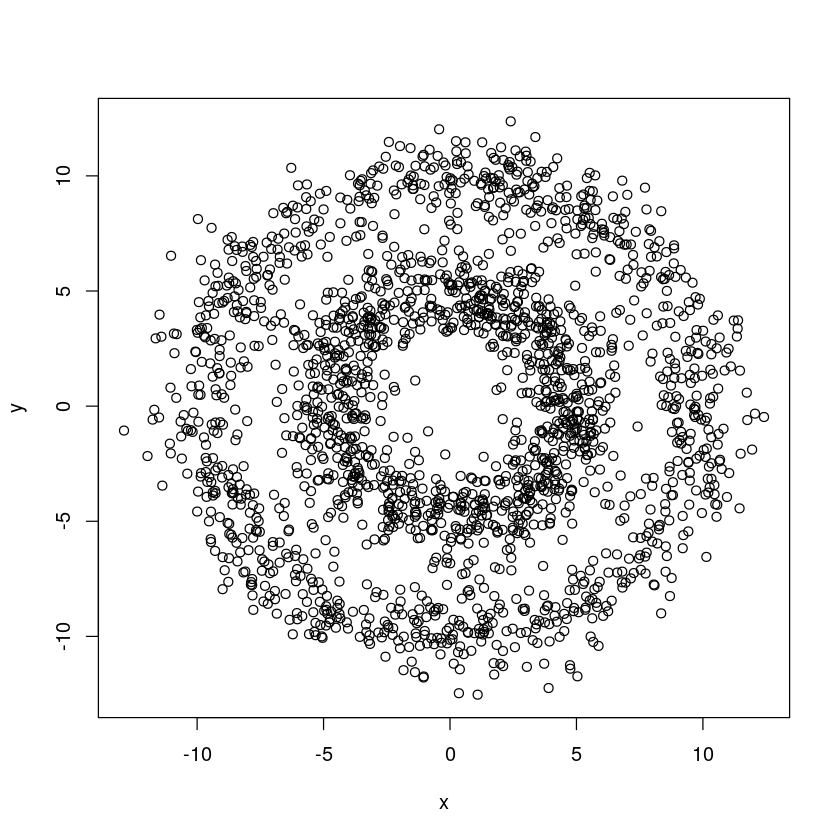

In [6]:
n=1000 # size
sig=1  # spread
muestra1=10 #mean radius sample A 
muestra2=5  #mean radius sample B

r=rnorm(n,muestra1,sig)
th=runif(n,0,2*pi)
r2=rnorm(n,muestra2,sig)
th2=runif(n,0,2*pi)
x=c(r*cos(th),r2*cos(th2))
y=c(r*sin(th),r2*sin(th2))
plot(x,y) # plot to check

Press [enter] to continue 
Press [enter] to continue a


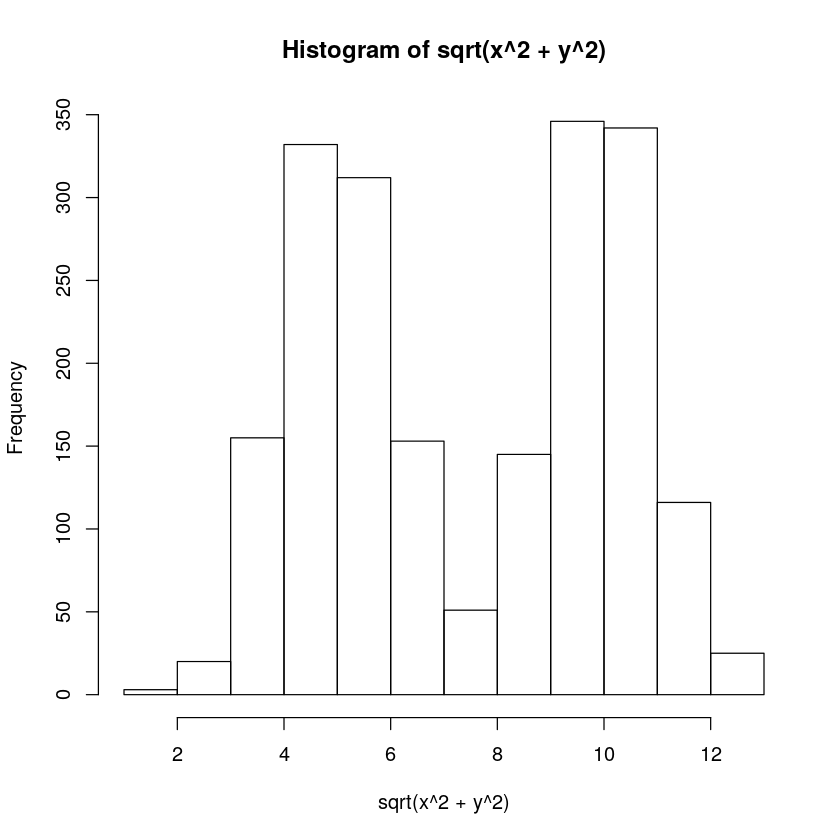

In [8]:
readline(prompt="Press [enter] to continue") #wait enter to continue
hist(sqrt(x^2+y^2)) #radial view
readline(prompt="Press [enter] to continue")
# create a labelled data frame, vars and target (1, 0)
trai=data.frame(x,y,c(rep(1,n),rep(0,n)))
colnames(trai)=c("x","y","tr")

In [9]:
# some operations to mix classes
nc=ncol(trai)
trai=trai[sample(1:nrow(trai),length(1:nrow(trai))),1:nc]
Values <- trai[,1:nc-1]
#Targets <- decodeClassLabels(trai[,nc]) # Internal RSNNS function to illustrate with iris
Targets <- trai[,nc] 
# split 15% of the sample for test
trai <- splitForTrainingAndTest(Values, Targets, ratio=0.15)
#normalize/preprocess
#trai <- normTrainingAndTestSet(trai,type="0_1") # norm 0_1 o center 
str(trai)

List of 4
 $ inputsTrain : num [1:1700, 1:2] -0,743 4,345 -0,116 1,753 -9,308 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1700] "822" "1366" "1468" "48" ...
  .. ..$ : chr [1:2] "x" "y"
 $ targetsTrain: num [1:1700] 1 0 0 1 1 0 0 1 0 0 ...
 $ inputsTest  : num [1:300, 1:2] 4,5169 8,5228 0,0274 5,3396 7,7684 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:300] "870" "164" "15" "1628" ...
  .. ..$ : chr [1:2] "x" "y"
 $ targetsTest : num [1:300] 1 1 1 0 1 1 0 1 1 1 ...


In [10]:
model <- mlp(trai$inputsTrain,trai$targetsTrain,size=c(10,5),
             inputsTest = trai$inputsTest, targetsTest = trai$targetsTest,
             outputActFunc = "Act_Logistic",
#             learnFunc = "Std_Backpropagation",learnFuncParams = c(0.1),
             learnFunc = "BackpropMomentum",learnFuncParams = c(0.1,0.1), 
#             learnFunc = "SCG", learnFuncParams = c(0.1),
              maxit = 500)
summary(model) #summarize results
plotnet(model) #plot the network with weight importance drawn with the line thickness

SNNS network definition file V1.4-3D
generated at Thu Jan  9 10:43:06 2020

network name : RSNNS_untitled
source files :
no. of units : 18
no. of connections : 75
no. of unit types : 0
no. of site types : 0


learning function : BackpropMomentum
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0,00000 |  0,00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName    | act      | bias     | st | position | act func     | out func | sites
----|----------|-------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_x     |  3,40886 |  0,19483 | i  |  1, 0, 0 | Act_Identity |          | 
  2 |          | Input_y     |  2,65393 |  0,29954 | i  |  2, 0, 0 | Act_Iden

ERROR: Error in plotnet(model): could not find function "plotnet"


In [23]:
model <- mlp(trai$inputsTrain,trai$targetsTrain,size=c(10,5),
             inputsTest = trai$inputsTest, targetsTest = trai$targetsTest,
             outputActFunc = "Act_Logistic",
#             learnFunc = "Std_Backpropagation",learnFuncParams = c(0.1),
             learnFunc = "BackpropMomentum",learnFuncParams = c(0.1,0.8), 
#             learnFunc = "SCG", learnFuncParams = c(0.1),
              maxit = 500)
summary(model) #summarize results

SNNS network definition file V1.4-3D
generated at Thu Jan  9 11:16:09 2020

network name : RSNNS_untitled
source files :
no. of units : 18
no. of connections : 75
no. of unit types : 0
no. of site types : 0


learning function : BackpropMomentum
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0,00000 |  0,00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName    | act      | bias     | st | position | act func     | out func | sites
----|----------|-------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_x     |  3,40886 | -0,23014 | i  |  1, 0, 0 | Act_Identity |          | 
  2 |          | Input_y     |  2,65393 | -0,19171 | i  |  2, 0, 0 | Act_Iden

Press [enter] to continue 
Press [enter] to continue 


[1] NA

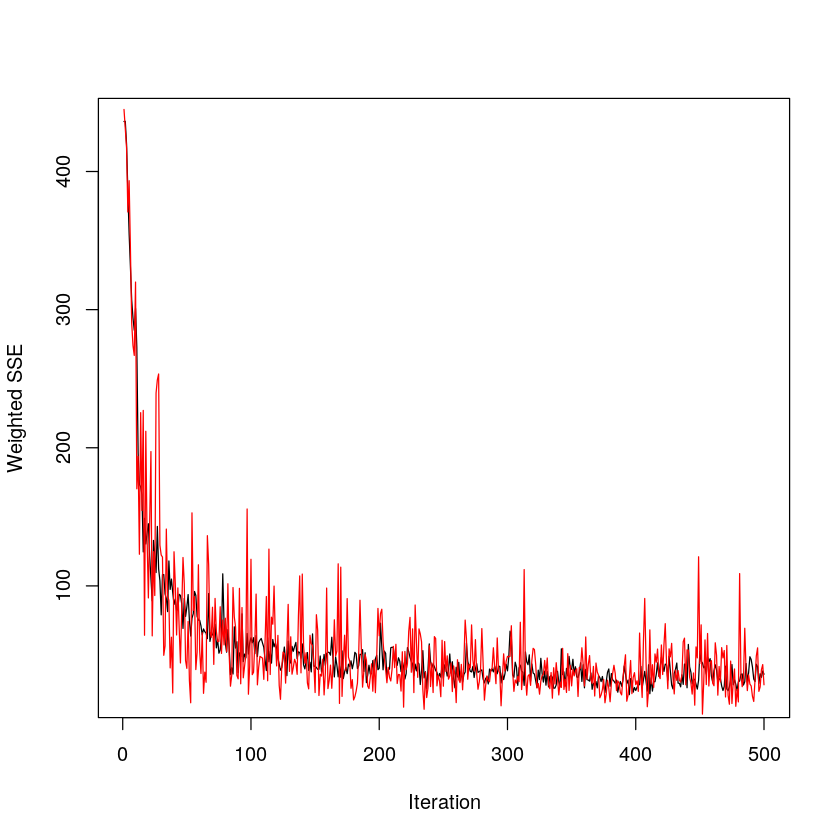

Press [enter] to continue 


$names
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "IterativeTestError"    "fitted.values"        
[16] "fittedTestValues"      "nOutputs"             

$class
[1] "mlp"   "rsnns"

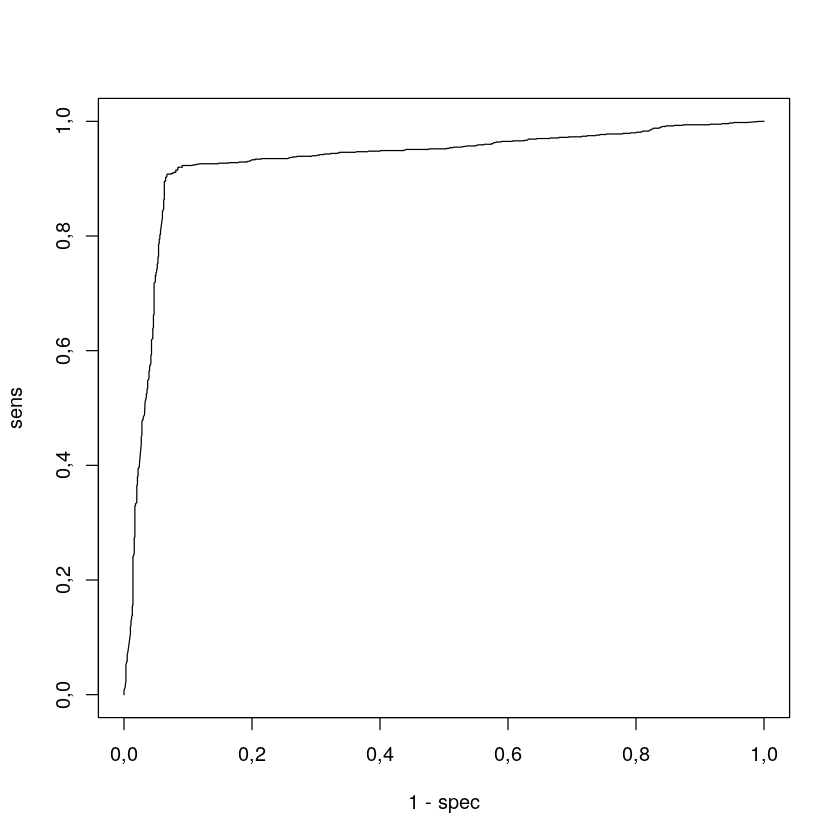

Press [enter] to continue 


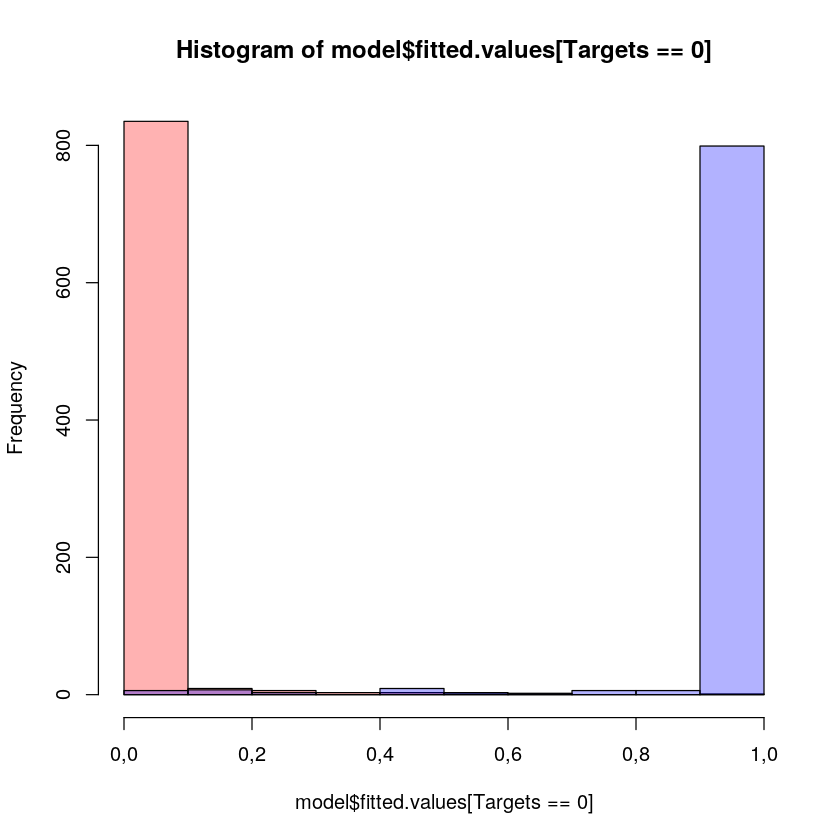

In [24]:
readline(prompt="Press [enter] to continue")
plotIterativeError(model)   #plots the error function evolution for test and validation
readline(prompt="Press [enter] to continue")
sum(model$fitted.values[Targets==0]>0.5)
plotROC(model$fitted.values,Targets)
readline(prompt="Press [enter] to continue")
attributes(model)
hist(model$fitted.values[Targets==0],col=rgb(1,0,0,0.3))
hist(model$fitted.values[Targets==1],col=rgb(0,0,1,0.3),add=T)
readline(prompt="Press [enter] to continue")

## Example 2 `redes_regresion.R`

Press [enter] to continue 


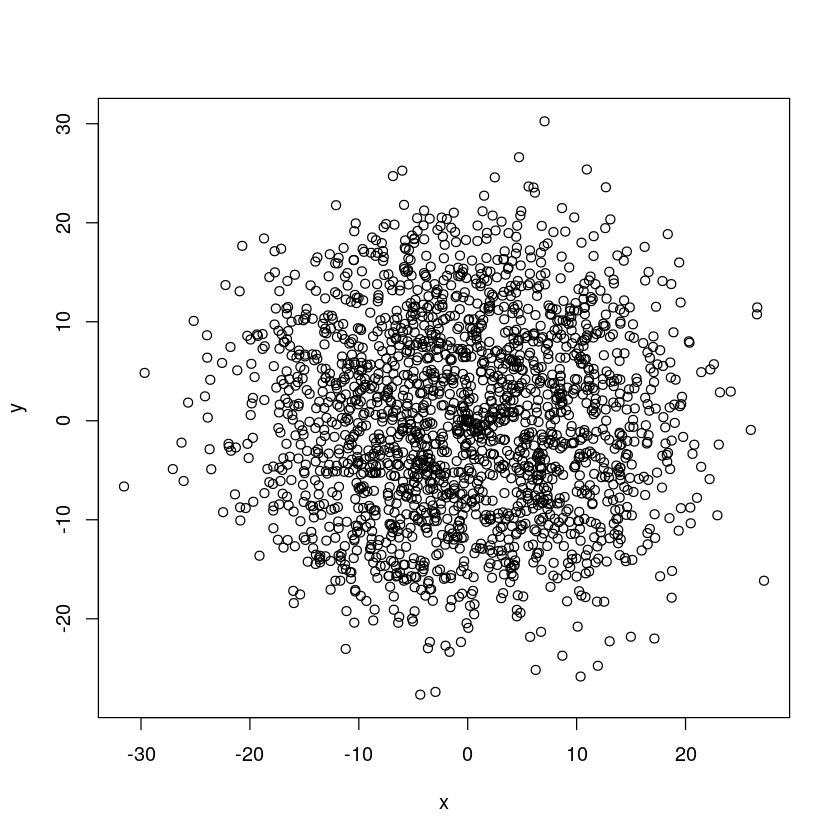

Press [enter] to continue 


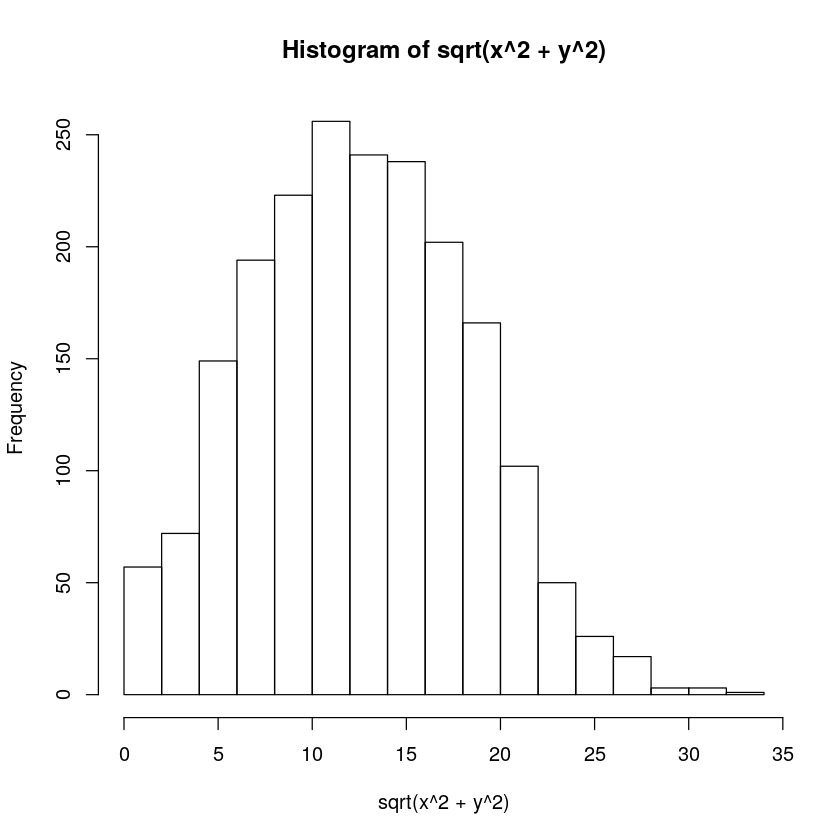

In [39]:
# create a sample x vs y whose theta is uniform
# r defined around a reference scanned from 5 to 20 with a noise N(0,sig) 
n=2000
sig=4
r0=seq(5,20,by=15/n)
r=rnorm(n,r0,sig)
th=runif(n,0,2*pi)
x=r*cos(th)
y=r*sin(th)
r0=r0[1:n]
targ=(r0-5)/15 #translate target into 0-1 range
plot(x,y)
readline(prompt="Press [enter] to continue")
hist(sqrt(x^2+y^2))
readline(prompt="Press [enter] to continue")

In [40]:
trai=data.frame(x,y,targ)
colnames(trai)=c("x","y","tr")
# some operations to mix classes
nc=ncol(trai)
trai=trai[sample(1:nrow(trai),length(1:nrow(trai))),1:nc]
Values <- trai[,1:nc-1]
Targets <- trai[,nc]
# split 15% of the sample for test
trai <- splitForTrainingAndTest(Values, Targets, ratio=0.15)
str(trai)

List of 4
 $ inputsTrain : num [1:1700, 1:2] -11,68 -7,59 -10,41 17,38 -3,50 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1700] "892" "1676" "1240" "1850" ...
  .. ..$ : chr [1:2] "x" "y"
 $ targetsTrain: num [1:1700] 0,446 0,838 0,620 0,924 0,152 ...
 $ inputsTest  : num [1:300, 1:2] 4,42 13,40 11,67 -17,20 -8,20 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:300] "1420" "532" "63" "1814" ...
  .. ..$ : chr [1:2] "x" "y"
 $ targetsTest : num [1:300] 0,710 0,266 0,031 0,906 0,342 ...


In [41]:
model <- mlp(trai$inputsTrain,trai$targetsTrain,size=20,
             inputsTest = trai$inputsTest, targetsTest = trai$targetsTest,
             outputActFunc = "Act_Logistic",
#             learnFunc = "Std_Backpropagation",learnFuncParams = c(0.1),
             learnFunc = "BackpropMomentum",learnFuncParams = c(0.1,0.1), 
#             learnFunc = "SCG", learnFuncParams = c(0.1),
              maxit = 2000)
summary(model)

SNNS network definition file V1.4-3D
generated at Thu Jan  9 11:36:50 2020

network name : RSNNS_untitled
source files :
no. of units : 23
no. of connections : 60
no. of unit types : 0
no. of site types : 0


learning function : BackpropMomentum
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0,00000 |  0,00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName    | act      | bias     | st | position | act func     | out func | sites
----|----------|-------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_x     | -5,18901 | -0,25640 | i  |  1, 0, 0 | Act_Identity |          | 
  2 |          | Input_y     | -15,70259 |  0,19381 | i  |  2, 0, 0 | Act_Ide

Press [enter] to continue 
Press [enter] to continue 


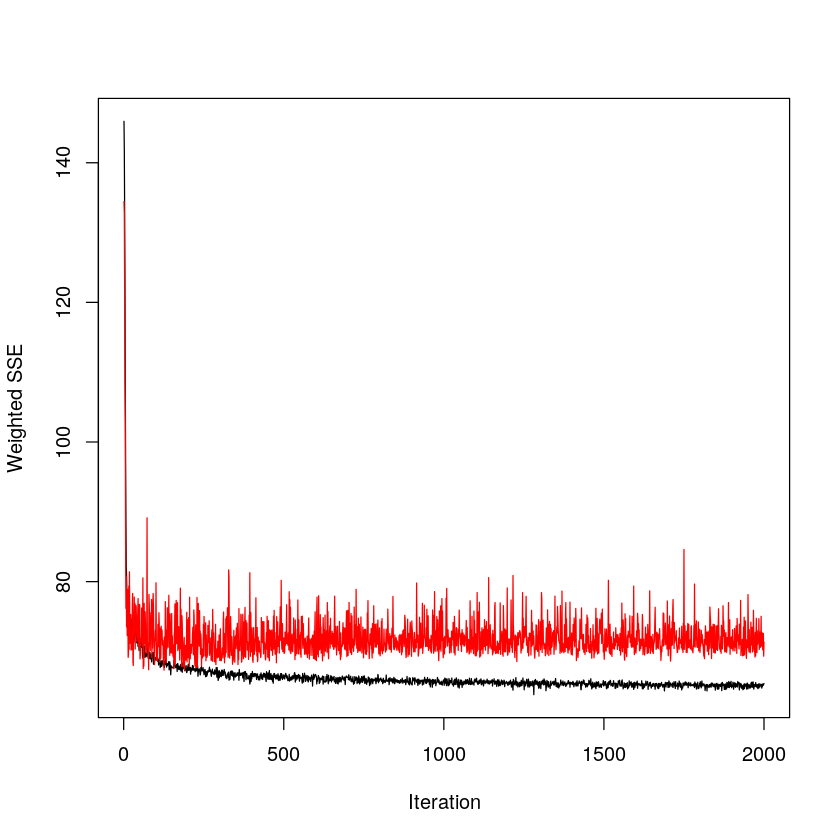

Press [enter] to continue 


$names
 [1] "nInputs"               "maxit"                 "initFunc"             
 [4] "initFuncParams"        "learnFunc"             "learnFuncParams"      
 [7] "updateFunc"            "updateFuncParams"      "shufflePatterns"      
[10] "computeIterativeError" "snnsObject"            "archParams"           
[13] "IterativeFitError"     "IterativeTestError"    "fitted.values"        
[16] "fittedTestValues"      "nOutputs"             

$class
[1] "mlp"   "rsnns"

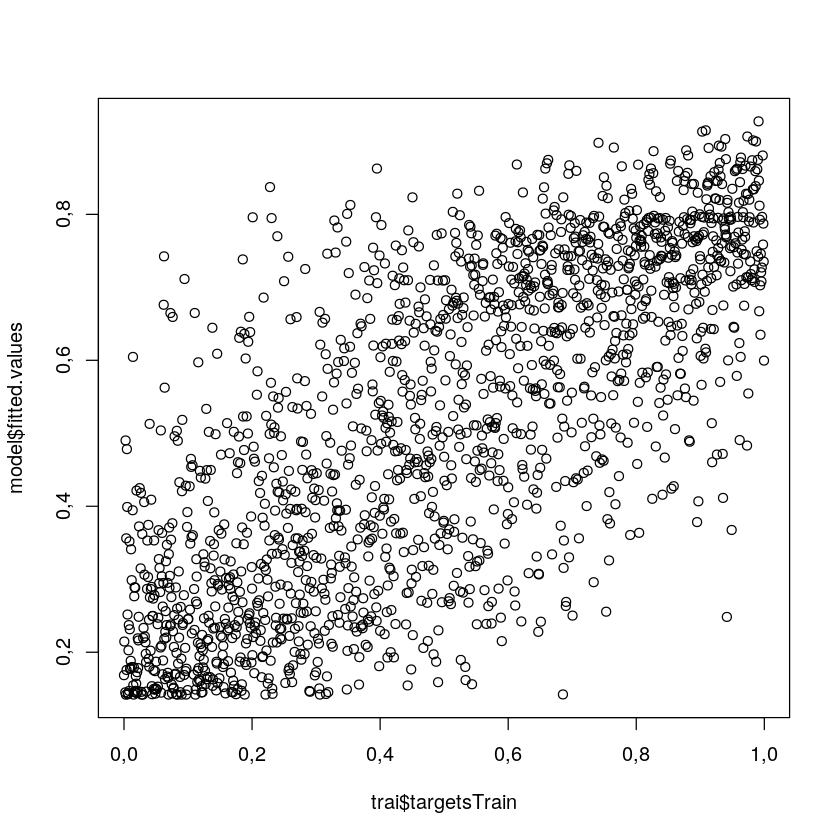

In [42]:
readline(prompt="Press [enter] to continue")
plotIterativeError(model)
readline(prompt="Press [enter] to continue")
#check regression, target vs output
plot(trai$targetsTrain,model$fitted.values) 
readline(prompt="Press [enter] to continue")
attributes(model)

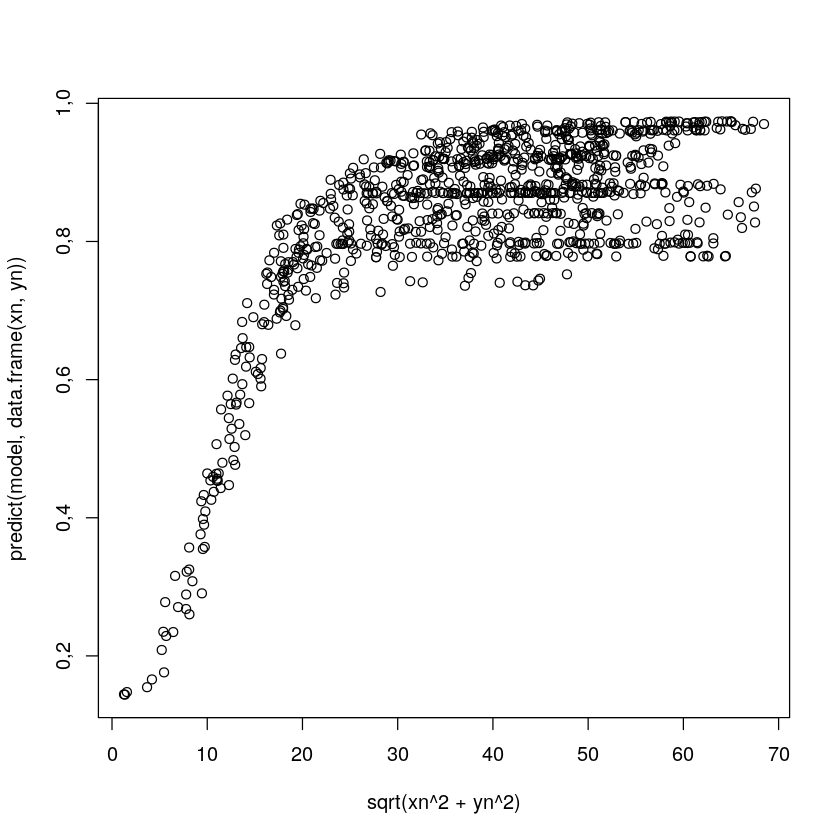

In [43]:
#check that extrapolation does not work
yn=runif(1e3,-50,50)
xn=runif(1e3,-50,50)
plot(sqrt(xn^2+yn^2),predict(model,data.frame(xn,yn)))

## Example 3 : `redes_noise.R`

## Example 4: `redes_parrilla.R`

In [8]:
n=1000
#set.seed(1)
# more complex example with "islands", A and B scattered around alternative nodes on a grid
sig=0.5
x0=sample(seq(0,3,by=1),2*n, replace=T)
y0=sample(seq(0,3,by=1),2*n, replace=T)
x=x0+rnorm(2*n)*sig
y=y0+rnorm(2*n)*sig
t=ifelse(2*floor((x0+y0)/2)==(x0+y0),1,0)
trai=data.frame(x,y,t)
colnames(trai)=c("x","y","tr")
# mix
nc=ncol(trai)
dt=trai[sample(1:nrow(trai),length(1:nrow(trai))),1:nc]
Values <- dt[,1:nc-1]
Targets <- dt[,nc]
# test/validation
trts <- splitForTrainingAndTest(Values, Targets, ratio=0.15)
dt=trts
str(dt)

List of 4
 $ inputsTrain : num [1:1700, 1:2] 0,597 1,360 2,036 0,474 -0,454 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:1700] "1016" "509" "171" "1638" ...
  .. ..$ : chr [1:2] "x" "y"
 $ targetsTrain: num [1:1700] 1 0 0 1 1 1 0 1 1 1 ...
 $ inputsTest  : num [1:300, 1:2] 2,351 0,581 3,666 0,164 -0,468 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:300] "539" "194" "1780" "1396" ...
  .. ..$ : chr [1:2] "x" "y"
 $ targetsTest : num [1:300] 1 1 0 1 1 1 1 1 1 0 ...


SNNS network definition file V1.4-3D
generated at Mon Jan 13 11:20:04 2020

network name : RSNNS_untitled
source files :
no. of units : 43
no. of connections : 460
no. of unit types : 0
no. of site types : 0


learning function : BackpropMomentum
update function   : Topological_Order


unit default section :

act      | bias     | st | subnet | layer | act func     | out func
---------|----------|----|--------|-------|--------------|-------------
 0,00000 |  0,00000 | i  |      0 |     1 | Act_Logistic | Out_Identity 
---------|----------|----|--------|-------|--------------|-------------


unit definition section :

no. | typeName | unitName    | act      | bias     | st | position | act func     | out func | sites
----|----------|-------------|----------|----------|----|----------|--------------|----------|-------
  1 |          | Input_x     | -0,07293 |  0,01592 | i  |  1, 0, 0 | Act_Identity |          | 
  2 |          | Input_y     |  1,58995 | -0,05353 | i  |  2, 0, 0 | Act_Ide

Press [enter] to continue 
Press [enter] to continue 
Press [enter] to continue 


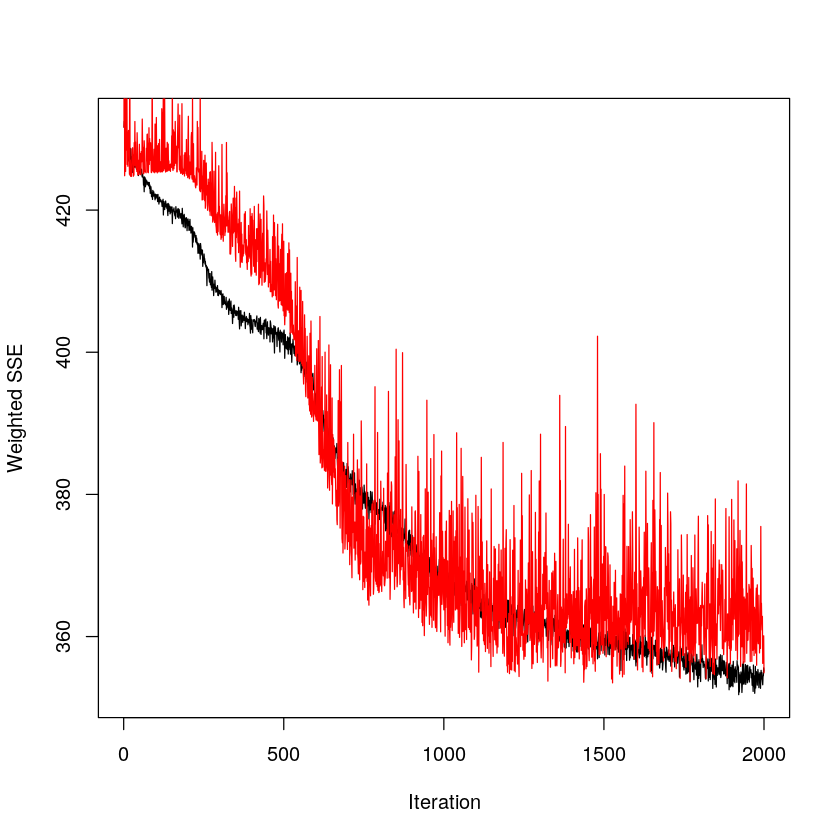

Press [enter] to continue 


Warning message in pad1.rm.cm(widths, cm.widths, len = num.cols):
“NAs introduced by coercion”

ERROR: Error in plot.new(): outer margins too large (figure region too small)


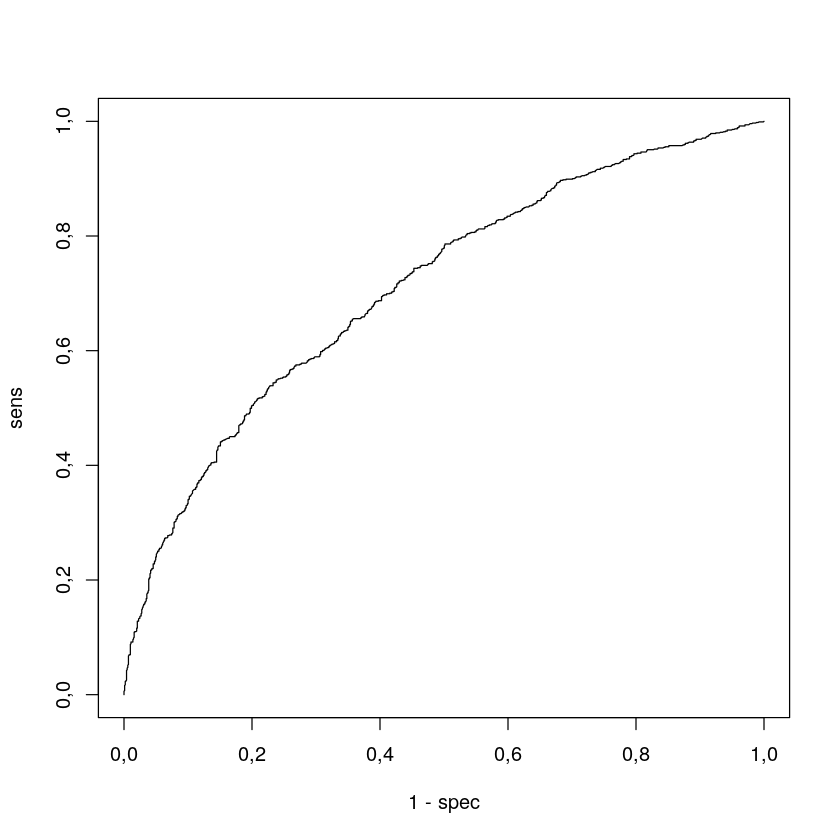

In [11]:
model <- mlp(dt$inputsTrain,dt$targetsTrain,size=c(20,20),
             inputsTest = dt$inputsTest, targetsTest = dt$targetsTest,
             outputActFunc = "Act_Logistic",
#             learnFunc = "Std_Backpropagation",learnFuncParams = c(0.1),
             learnFunc = "BackpropMomentum",learnFuncParams = c(0.1,0.1), 
#             learnFunc = "SCG", learnFuncParams = c(0.1),
              maxit = 2000)
summary(model)
readline(prompt="Press [enter] to continue")
#plotnet(model)
readline(prompt="Press [enter] to continue")
plotIterativeError(model)
readline(prompt="Press [enter] to continue")
plotROC(model$fitted.values,Targets)
readline(prompt="Press [enter] to continue")
xn=seq(-1,4,by=0.1)
yn=seq(-1,4,by=0.1)
out=outer(xn,yn,function(x,y){predict(model,data.frame(x,y))})
xp=dt$inputsTest[,1]
yp=dt$inputsTest[,2]
sa=dt$targetsTest==0
sb=dt$targetsTest==1
xa=xp[sa]
ya=yp[sa]
xb=xp[sb]
yb=yp[sb]
filled.contour(xn,yn,out,color=heat.colors,plot.axes={axis(1);axis(2);grid();lines(xa,ya,type="p");lines(xb,yb,type="p",pch=0)})
readline(prompt="Press [enter] to continue")
A=model$fittedTestValues[sa]<0.5
B=model$fittedTestValues[sa]>0.5
Ab=model$fittedTestValues[sb]<0.5
Bb=model$fittedTestValues[sb]>0.5
plot(xa[A],ya[A],xlim=range(xp),ylim=range(yp),xlab="",ylab="")
lines(xa[B],ya[B],col="red",type="p")
lines(xb[Ab],yb[Ab],pch=0,col="red",type="p")
lines(xb[Bb],yb[Bb],pch=0,type="p")
#efficiency matrix
tA=sum(sa)
tB=sum(sb)
cat(sum(A)/tA,sum(B)/tA,"\n")
cat(sum(Ab)/tB,sum(Bb)/tB,"\n")